***The first part of this notbook contains data cleaning and seeing if we find patterns***

In [116]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/kaggle/input/laptop-price-dataset/laptop_prices.csv')
df

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83
...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13


In [117]:
#Checking for null and other type of information and features of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [118]:
print(df['Brand'].unique())
print(df['Processor'].unique())
print(df['RAM (GB)'].unique())
print(df['Storage'].unique())
print(df['GPU'].unique())
print(df['Operating System'].unique())
print(df['Battery Life (hours)'].unique())


['Apple' 'Razer' 'Asus' 'Lenovo' 'Acer' 'Dell' 'Microsoft' 'HP' 'Samsung'
 'MSI']
['AMD Ryzen 3' 'AMD Ryzen 7' 'Intel i5' 'Intel i3' 'AMD Ryzen 9'
 'AMD Ryzen 5' 'Intel i9' 'Intel i7']
[64  4 32  8 16]
['512GB SSD' '1TB SSD' '2TB SSD' '256GB SSD' '1TB HDD']
['Nvidia GTX 1650' 'Nvidia RTX 3080' 'Nvidia RTX 3060'
 'AMD Radeon RX 6600' 'Nvidia RTX 2060' 'AMD Radeon RX 6800' 'Integrated']
['FreeDOS' 'Linux' 'Windows' 'macOS']
[ 8.9  9.4  8.5 10.5  5.7  7.1  9.1  9.8 11.5  7.5  6.4  8.3  9.3 10.9
 11.8  7.8 11.6 10.   7.2 11.4  7.  11.9  6.9  4.4  6.2  9.9  5.4  4.9
  5.   7.6  8.   6.6 11.3 10.3  4.5  9.6 11.1  5.9  4.8  4.6  8.2  8.1
  5.3  6.3  4.3  9.7  5.1 10.1 11.2  6.1 10.7  4.7  4.1  4.2  8.6  7.9
 10.8  5.8  6.7 11.   9.5  5.5  9.2 10.6  6.5  7.4 11.7  5.2  8.7 10.4
 12.   6.8  6.   7.7  8.8  8.4  5.6  7.3 10.2  9.   4. ]


In [134]:
#***I will try to answer these questions from this analysis 
#1️⃣ How does price vary across different brands? (Find the most expensive & budget-friendly brands)
#2️⃣ Which specs (RAM, processor, GPU) have the biggest impact on price? (Identify key price drivers.)
#3️⃣ Which laptops offer the longest battery life? (Great for students & professionals.)
#4️⃣ Is there a trade-off between performance (CPU/GPU) and battery life? (Find the balance between power & portability.)
#5️⃣ What is the ideal laptop for gaming? (Look at GPU, RAM, and price.)
#6️⃣ What is the best laptop under ₹X (or $X)? (Find budget-friendly options.)***

In [ ]:
#(1) How does price vary across different brands?
#(Find the most expensive & budget-friendly brands.)

#COLUMN NAMES ARE GIVEN BELOW FOR REFERENCE 
#Index(['Brand', 'Processor', 'RAM (GB)', 'Storage', 'GPU',
      # 'Screen Size (inch)', 'Resolution', 'Battery Life (hours)',
       #'Weight (kg)', 'Operating System', 'Price ($)'],
      #dtype='object')
avg_price_ByBrand=df.groupby('Brand')['Price ($)'].mean().sort_values(ascending=False)
avg_price_ByBrand

             Price ($)
Brand                 
Apple      2915.364279
Razer      2695.213804
MSI        2517.552227
Lenovo     1978.465790
Microsoft  1975.203549
Dell       1972.270222
Samsung    1959.007248
HP         1938.518733
Asus       1927.315142
Acer       1914.108515


<Axes: xlabel='Brand', ylabel='Price ($)'>

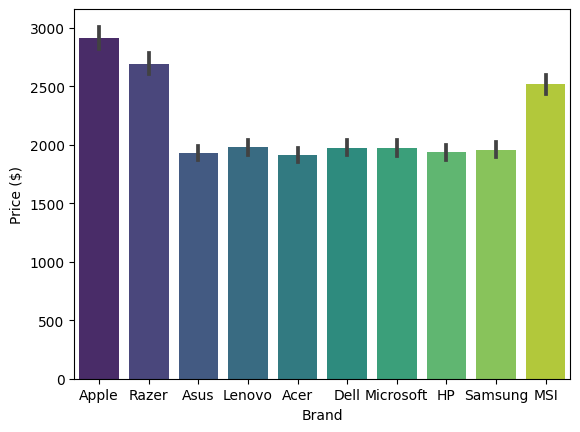

In [132]:
df2=pd.DataFrame(avg_price_ByBrand)
print(df2)
sns.barplot(x=df['Brand'],y=df['Price ($)'],palette='viridis')

**The visualization clearly shows that Apple and Razor laptops are the costliest and Acer laptops are the cheapest with brands like Asus, lenovo,Dell,Microsoft, and HP being affordable.This answers our first question**

10807.88

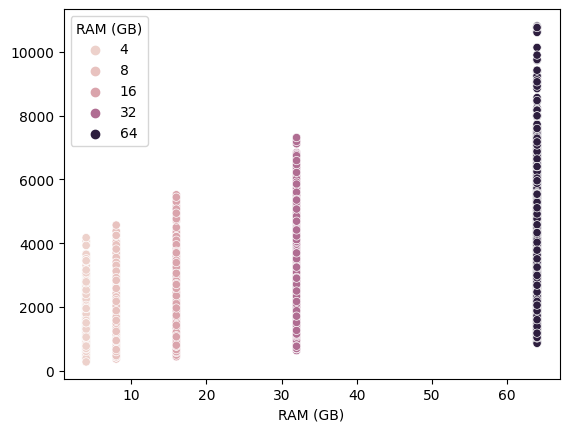

In [131]:
# 2️⃣ Which specs (RAM, processor, GPU) have the biggest impact on price? (Identify key price drivers.)
prices=np.array(df['Price ($)'])

sns.set_palette("flare")
sns.scatterplot(x=df['RAM (GB)'],y=prices,hue=df['RAM (GB)'])
df['Price ($)'].max()

**It is evident from this scatterplot that the price increases with respect to the RAM used it shows a linear relation between the RAM and the price. This also shows higher the RAM used costlier the laptop gets**

**The same can be demonstrated by using line and bar plots**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='RAM (GB)', ylabel='Price ($)'>

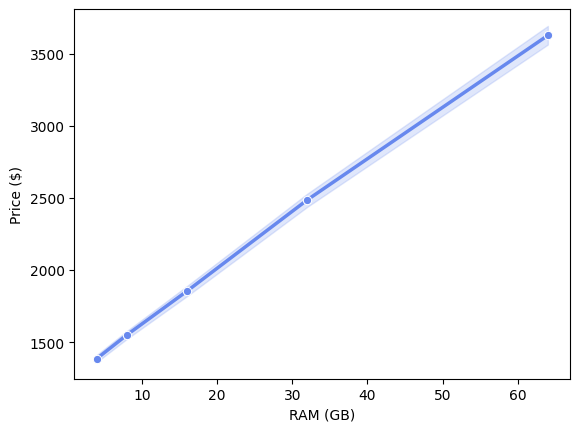

In [130]:

#line plot showing the linear relationship between prices and RAM 
sns.set_palette('coolwarm')
sns.lineplot(data=df, x="RAM (GB)", y="Price ($)", marker="o", linewidth=2.5)  # Pink for beauty theme


<Axes: xlabel='RAM (GB)'>

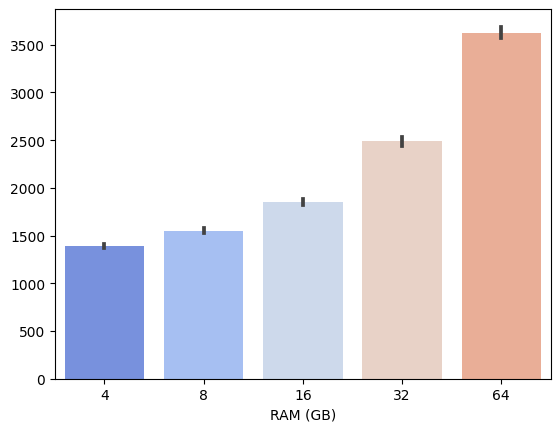

In [129]:
sns.barplot(x=df['RAM (GB)'],y=prices)
#The barplot confirms the same 

<Axes: xlabel='Processor'>

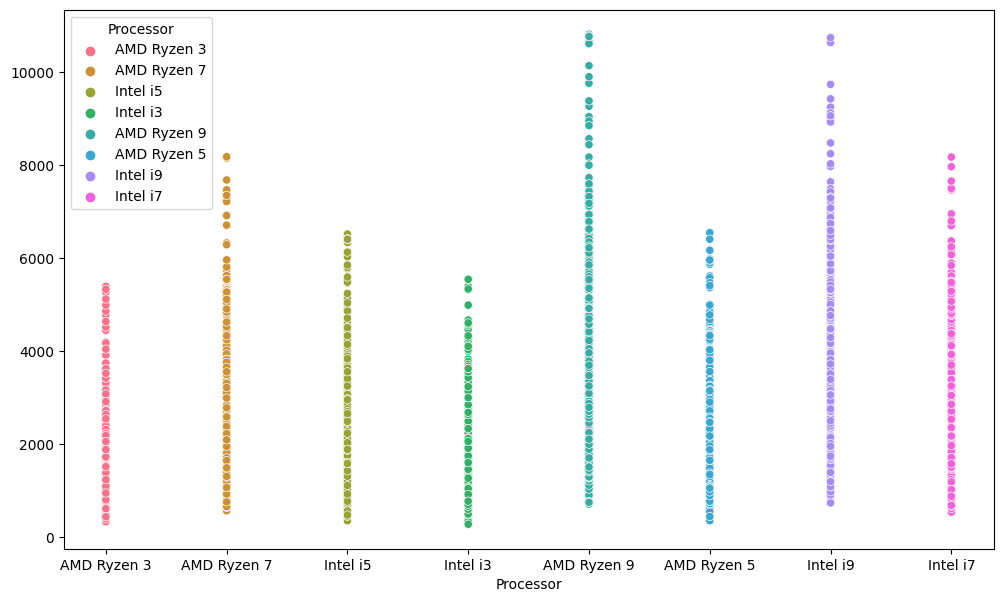

In [128]:
prices=np.array(df['Price ($)'])
plt.figure(figsize=(12,7))
sns.set_palette("coolwarm")
sns.scatterplot(x=df['Processor'],y=prices,hue=df['Processor'])



****Out of 8 types of processors, laptops having Intel i9 or AMD Ryzen 9 are the costliest followed Intel i7 and AMD Ryzen 3****

The GPUs we are gonna see are :['Nvidia GTX 1650' 'Nvidia RTX 3080' 'Nvidia RTX 3060'
 'AMD Radeon RX 6600' 'Nvidia RTX 2060' 'AMD Radeon RX 6800' 'Integrated']


<Axes: xlabel='GPU', ylabel='Price ($)'>

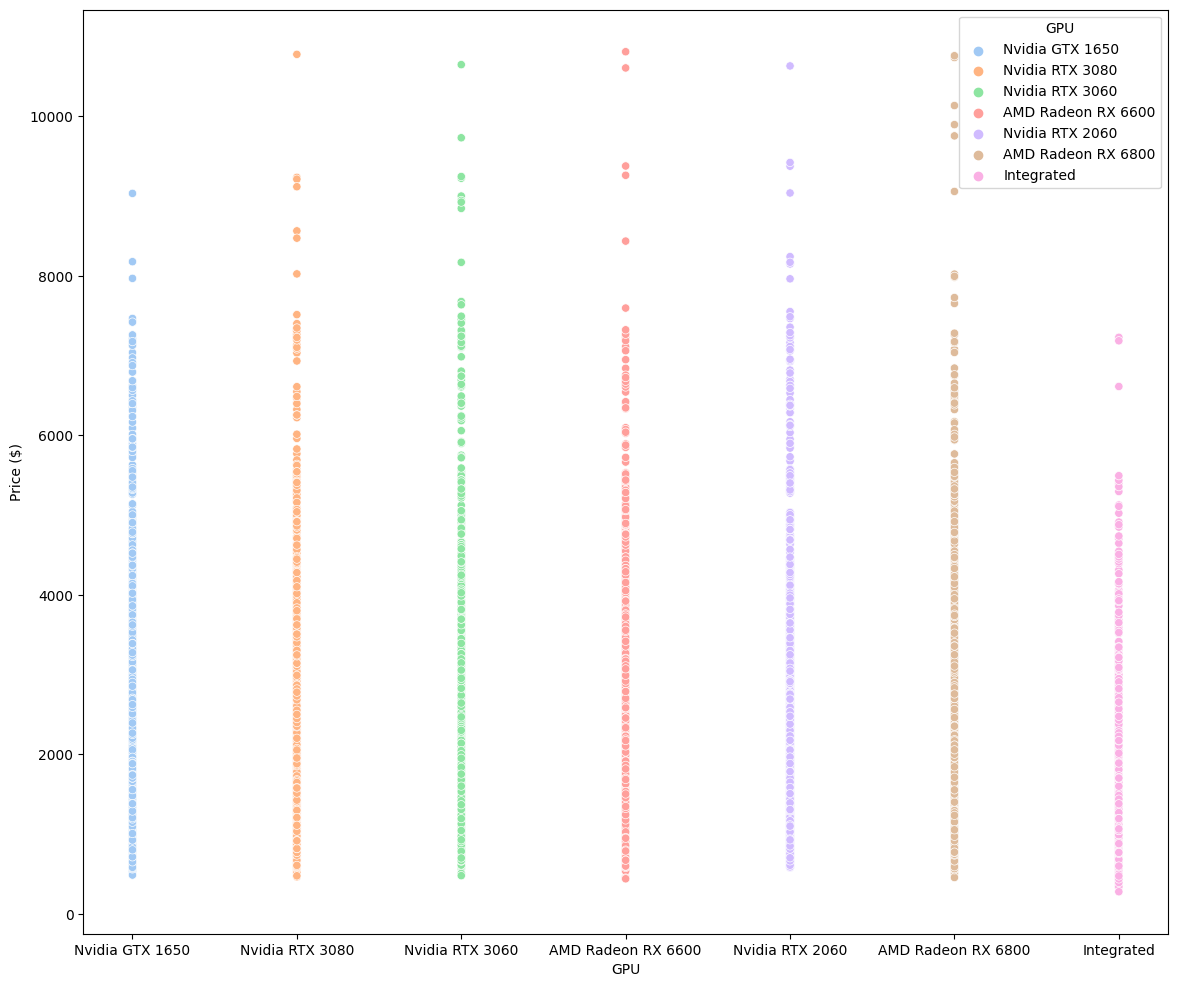

In [127]:
#Now we will check for the relation between the price and and the GPU used 
GPU=df['GPU'].unique()
print(f'The GPUs we are gonna see are :{GPU}')
plt.figure(figsize=(14,12))
sns.scatterplot(x=df['GPU'],y=df['Price ($)'],palette='pastel',hue=df['GPU'])

**By the scatterplot it is clear that the type of GPU does not effect the price as much as other factors like processor and RAM does, so in conclusion processors and RAM heavily decides the cost of manufacturing a laptop while type of GPU has a small effect**

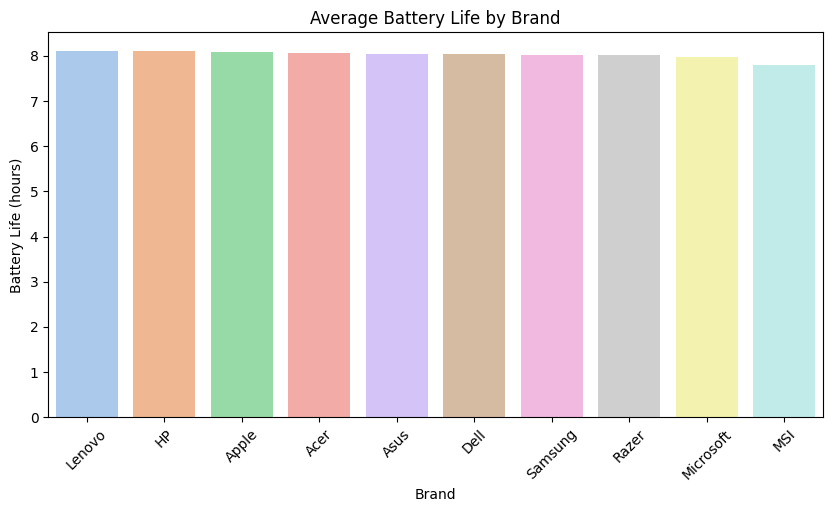

In [120]:
#3️⃣ Which laptops offer the longest battery life? (Great for students & professionals.)
#Battery Life (hours)
#df['Battery Life (hours)'].unique()
batteryLife_ByBrand=df.groupby('Brand')['Battery Life (hours)'].mean().sort_values(ascending=False)
batt_df=batteryLife_ByBrand.reset_index()
#battery_df=pd.DataFrame(batteryLife_ByBrand)
plt.figure(figsize=(10,5))
sns.barplot(x=batt_df['Brand'],y=batt_df['Battery Life (hours)'],palette='pastel')
plt.xticks(rotation=45)
plt.title("Average Battery Life by Brand")
plt.ylabel("Battery Life (hours)")
plt.xlabel("Brand")

plt.show()


**It seems that there is not much difference in the battery life of these laptops but however Lenovo has the the highest battery life followed by HP and Apple so these top 3 could be a best fit for students and professionals**

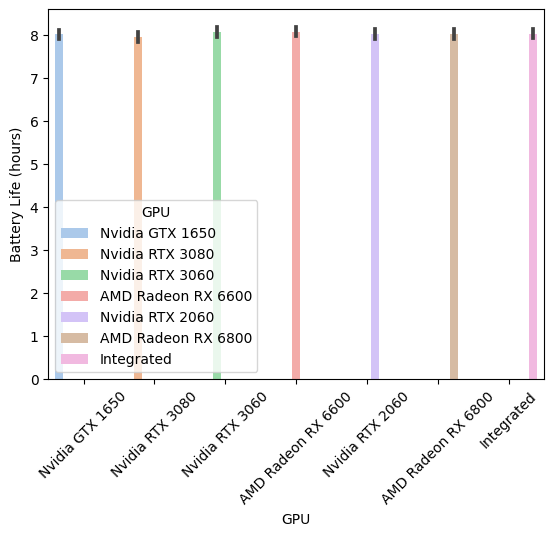

In [121]:
# 4️⃣ Is there a trade-off between performance (CPU/GPU) and battery life? (Find the balance between power & portability.)
df.groupby(['GPU'])['Battery Life (hours)'].mean()
import matplotlib.pyplot as plt
import seaborn as sns 
sns.barplot(data=df,x='GPU',y='Battery Life (hours)',palette='pastel',hue='GPU')
plt.xticks(rotation=45)
plt.show()

**The graph show that no matter what GPU you use , the batterylife  more or less remains the same**

In [122]:
# 5️⃣ What is the ideal laptop for gaming? (Look at GPU, RAM, and price.)
df.groupby(['GPU','RAM (GB)',])['Price ($)'].mean().unstack('GPU')

GPU,AMD Radeon RX 6600,AMD Radeon RX 6800,Integrated,Nvidia GTX 1650,Nvidia RTX 2060,Nvidia RTX 3060,Nvidia RTX 3080
RAM (GB),,,,,,,
4,1434.393665,1460.648723,963.850616,1423.346352,1463.207710,1527.320445,1466.606119
8,1652.582706,1622.400000,1100.642752,1601.412448,1646.557585,1595.122099,1643.343365
16,1964.607024,1975.939091,1248.659286,1915.209544,1918.040977,2012.669363,1932.136697
32,2669.906387,2560.620162,1684.354325,2681.036210,2539.471201,2692.260590,2533.878349
64,3710.486837,3846.592647,2572.553988,3729.283818,3857.410060,3807.626329,3809.131473


**This question is not straightforward because a laptop must have certain features in order to be called as a gaming laptop so there must be minimum 16 GB RAM, all the processors except the integrated GPUs in the datasheet are excellent for a gaming laptop**

In [123]:
df['GPU'].unique()

array(['Nvidia GTX 1650', 'Nvidia RTX 3080', 'Nvidia RTX 3060',
       'AMD Radeon RX 6600', 'Nvidia RTX 2060', 'AMD Radeon RX 6800',
       'Integrated'], dtype=object)

In [124]:
gaming_GPU=['Nvidia GTX 1650', 'Nvidia RTX 3080', 'Nvidia RTX 3060',
       'AMD Radeon RX 6600', 'Nvidia RTX 2060', 'AMD Radeon RX 6800']

filtered_df = df[(df['GPU'].isin(gaming_GPU)) &(df['RAM (GB)']>=16)& (df['Price ($)'] >= 500) & (df['Price ($)'] <= 900)]
filtered_df

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
231,Microsoft,AMD Ryzen 3,16,1TB HDD,Nvidia RTX 2060,17.3,1366x768,9.3,1.78,Linux,773.14
267,Samsung,Intel i3,16,2TB SSD,Nvidia GTX 1650,16.0,1366x768,8.9,3.46,macOS,793.30
293,Lenovo,AMD Ryzen 3,16,1TB HDD,AMD Radeon RX 6800,17.3,1366x768,4.6,1.74,Windows,845.64
1331,Microsoft,AMD Ryzen 3,16,256GB SSD,AMD Radeon RX 6600,17.3,1366x768,11.5,2.32,FreeDOS,814.65
1466,Samsung,Intel i3,16,1TB HDD,Nvidia RTX 2060,14.0,1366x768,4.4,1.72,Linux,711.57
...,...,...,...,...,...,...,...,...,...,...,...
11212,Dell,AMD Ryzen 5,16,1TB HDD,Nvidia GTX 1650,13.3,1366x768,5.0,1.28,Linux,721.57
11243,Dell,Intel i3,16,1TB HDD,AMD Radeon RX 6800,14.0,1366x768,5.4,2.07,FreeDOS,665.36
11287,HP,AMD Ryzen 3,16,256GB SSD,Nvidia RTX 3080,14.0,1366x768,7.9,1.34,Linux,876.81
11346,Microsoft,Intel i5,16,1TB SSD,Nvidia RTX 2060,13.3,1366x768,7.3,1.69,FreeDOS,895.56


In [125]:

result = pd.DataFrame(filtered_df.groupby(['GPU','Brand'])['Price ($)'].mean())
result=result.reset_index
result

<bound method DataFrame.reset_index of                                Price ($)
GPU                Brand                
AMD Radeon RX 6600 Acer       819.470000
                   Asus       756.927500
                   HP         895.480000
                   Lenovo     826.350000
                   MSI        884.410000
                   Microsoft  814.580000
                   Samsung    838.120000
AMD Radeon RX 6800 Acer       753.720000
                   Asus       861.440000
                   Dell       670.090000
                   HP         842.670000
                   Lenovo     846.950000
                   Microsoft  812.545000
                   Samsung    806.130000
Nvidia GTX 1650    Acer       733.458000
                   Dell       721.570000
                   HP         874.980000
                   Lenovo     808.000000
                   Microsoft  876.960000
                   Samsung    848.333333
Nvidia RTX 2060    Acer       893.130000
                  

**The above dataframe shows the best GPUs for a gaming laptop and what brands have these laptops under the price range of 500-900 $**

In [126]:
# 6️⃣ What is the best laptop under ₹X (or $X)? (Find budget-friendly options.)


**The questions is answered with the question 5 because a price range of 500-900 $ is considered budget freindly.Here our laptop analysis ends and please do upvote my notebook if you find it usefull as it required a lot of research and any suggestion is welcomed**